In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt

import scipy
from scipy import signal,stats
from scipy.fft import rfft,rfftfreq,irfft
from scipy import stats
from scipy.ndimage import uniform_filter1d

import seaborn as sns
import pandas as pd
import sklearn
import seaborn as sns

In [ ]:
# # Create function to load data 

filenames = ['250124_openbci_test2.txt'] 

filenames2 = ['250130_time_series_data.txt']


channels = ['0','1','2','3']

def load_data(file_path):
    data_file = pd.read_csv(file_path, comment='%', header=0, delimiter=',', engine='python') 
    data = data_file[[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3']].values.T
    return data

# # Load test data
test_data = load_data(f'.../OpenBCI_Test/{filenames[0]}')
print(f'Test Data Shape: {test_data.shape}')

test_data2 = pd.read_csv('.../OpenBCI_Test/250130_time_series_data.txt').T.values
print(f'Test Data 2 Shape: {test_data2.shape}')

fs=200

# print(np.isnan(test_data2[0]))

Test Data Shape: (4, 1227)
Test Data 2 Shape: (1, 5743)


In [5]:
fs=200
channels = ['Ch 0', 'Ch 1', 'Ch 2', 'Ch 3']
t_vec = np.arange(0, test_data.shape[1]/fs,1/fs)
t_vec2 = np.arange(0,test_data2.shape[1]/fs,1/fs)

# Apply a bandpass filter between 4-40 Hz to each set of data
filt_coef = signal.firwin(numtaps=(int(3*fs/4)), cutoff=(0.5,50), fs=fs, pass_zero=False)

# Apply a rolling (moving average) filter to Luisa Data
def smooth_signal(data, window_size=3):
    return uniform_filter1d(data, size=window_size)

# # Design bandpass filter (2–50 Hz)
# nyquist = fs / 2
# low, high = 2 / nyquist, 50 / nyquist
# b, a = signal.bessel(N=4, Wn=[low, high], btype='band')

# # Apply zero-phase filtering (filtfilt avoids phase shift)
# filtered_data = signal.filtfilt(b, a, raw_data, axis=-1)



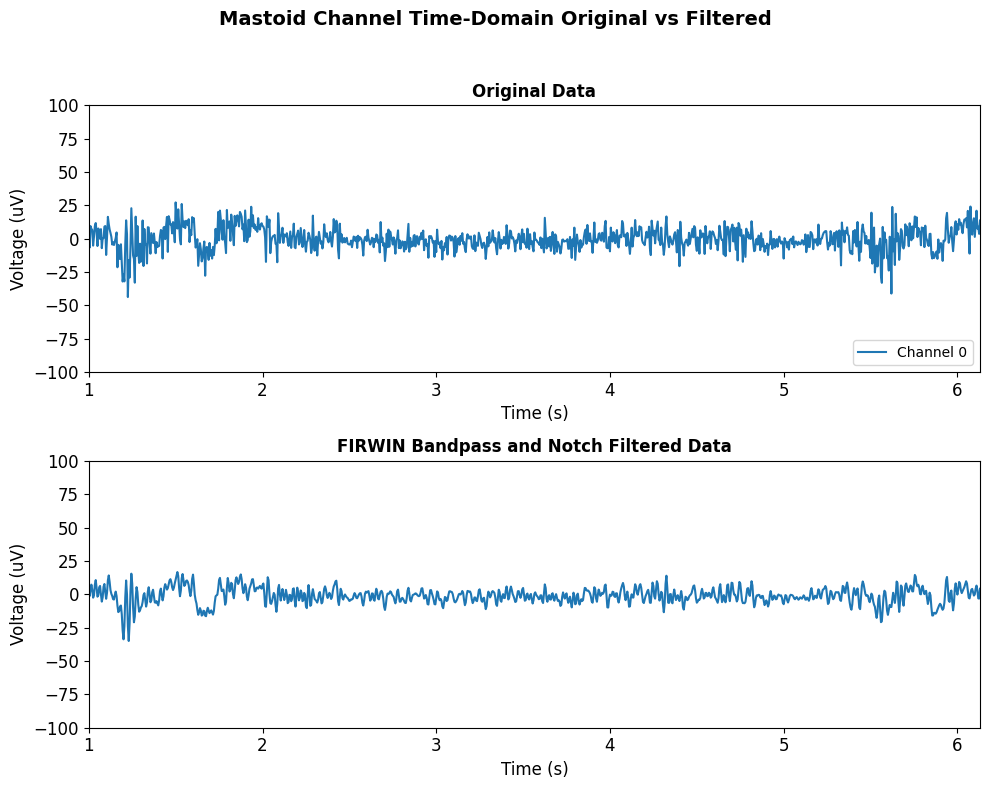

In [6]:


def plot_time_series_wwo_filter(data, fs, channels, power_ylim=None):

    n_channels, n_samples = data.shape

    fig, axes = plt.subplots(2, 1, figsize=(10,8))
    fig.suptitle("Mastoid Channel Time-Domain Original vs Filtered", fontsize=14, fontweight='bold')

    t_vec = np.arange(0, data.shape[1]/fs,1/fs)

    # original data
    
    axes[0].plot(t_vec, data[0]-np.mean(data[0]), label=f'Channel 0')

    axes[0].set_title('Original Data', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Time (s)', fontsize=12)
    axes[0].set_ylabel('Voltage (uV)', fontsize=12)
    axes[0].tick_params(axis='both', which='major', labelsize=12)
    axes[0].set_xlim([1,t_vec[-1]])
    axes[0].set_ylim([-100,100])
    axes[0].legend(loc='lower right')



    # Try out bessel filter (2–50 Hz)
    # nyquist = fs / 2
    # low, high = 0.5 / nyquist, 50 / nyquist
    # b, a = signal.bessel(N=4, Wn=[low, high], btype='band')

    # Try notch filter 
    notch_freq = 60.0  
    quality_factor = 30
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, fs)
    
    # # Apply zero-phase filtering
    # filtered_data = signal.filtfilt(b, a, data, axis=-1)

    #Apply bandpass filter (using FIR filter)
    bp_filtered_data = signal.filtfilt(filt_coef,1.0,data, axis=-1)

    # Notch filter (50 Hz, Butterworth)
    notch_filtered_data = signal.filtfilt(b_notch, a_notch, bp_filtered_data, axis=-1)
    bp_filtered_mc = notch_filtered_data[0] - notch_filtered_data[0].mean()

    # Plot filtered data
    
    axes[1].plot(t_vec, bp_filtered_mc, label=f'Channel 0')

    axes[1].set_title('FIRWIN Bandpass and Notch Filtered Data', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Time (s)', fontsize=12)
    axes[1].set_ylabel('Voltage (uV)', fontsize=12)
    axes[1].tick_params(axis='both', which='major', labelsize=12)
    axes[1].set_xlim([1,t_vec[-1]])
    axes[1].set_ylim([-100,100])


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return 

plot_time_series_wwo_filter(test_data,fs,channels=channels)


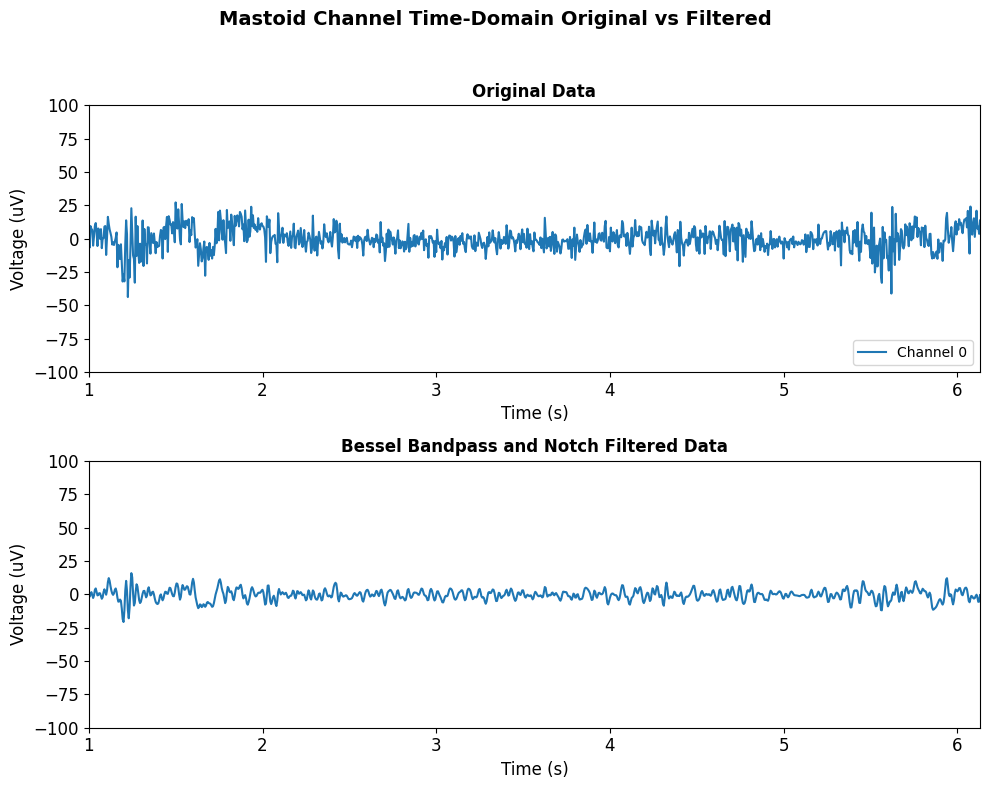

In [7]:


def plot_time_series_wwo_filter(data, fs, channels, power_ylim=None):

    n_channels, n_samples = data.shape

    fig, axes = plt.subplots(2, 1, figsize=(10,8))
    fig.suptitle("Mastoid Channel Time-Domain Original vs Filtered", fontsize=14, fontweight='bold')

    t_vec = np.arange(0, data.shape[1]/fs,1/fs)

    # original data
    
    axes[0].plot(t_vec, data[0]-np.mean(data[0]), label=f'Channel 0')

    axes[0].set_title('Original Data', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Time (s)', fontsize=12)
    axes[0].set_ylabel('Voltage (uV)', fontsize=12)
    axes[0].tick_params(axis='both', which='major', labelsize=12)
    axes[0].set_xlim([1,t_vec[-1]])
    axes[0].set_ylim([-100,100])
    axes[0].legend(loc='lower right')



    # Try out bessel filter (2–50 Hz)
    nyquist = fs / 2
    low, high = 2 / nyquist, 50 / nyquist
    b, a = signal.bessel(N=4, Wn=[low, high], btype='band')

    # Try notch filter 
    notch_freq = 60.0  
    quality_factor = 30
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, fs)
    
    # Apply zero-phase filtering
    filtered_data = signal.filtfilt(b, a, data, axis=-1)
    notch_filtered_data = signal.filtfilt(b_notch, a_notch, filtered_data, axis=-1)

    # Apply bandpass filter (using FIR filter)
    # bp_filtered_data = signal.filtfilt(filt_coef,1.0,data, axis=-1)

    # Notch filter (50 Hz, Butterworth)
    
    bp_filtered_mc = notch_filtered_data[0] - notch_filtered_data[0].mean()

    # Plot filtered data
    
    axes[1].plot(t_vec, bp_filtered_mc, label=f'Channel 0')

    axes[1].set_title('Bessel Bandpass and Notch Filtered Data', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Time (s)', fontsize=12)
    axes[1].set_ylabel('Voltage (uV)', fontsize=12)
    axes[1].tick_params(axis='both', which='major', labelsize=12)
    axes[1].set_xlim([1,t_vec[-1]])
    axes[1].set_ylim([-100,100])
    #axes[1].legend(loc='upper right')

    # # Plot smoothed data

    # smoothed_data = smooth_signal(bp_filtered_mc)
    
    # axes[2].plot(t_vec, smoothed_data)

    # axes[2].set_title('Smoothed and Filtered Data', fontsize=14, fontweight='bold')
    # axes[2].set_xlabel('Time (s)', fontsize=14)b
    # axes[2].set_ylabel('Voltage (uV)', fontsize=14)
    # axes[2].tick_params(axis='both', which='major', labelsize=12)
    # axes[2].set_xlim([1,t_vec[-1]])
    # axes[2].set_ylim([-100,100])
    # #axes[2].legend(loc='upper right')


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return 

plot_time_series_wwo_filter(test_data,fs,channels=channels)


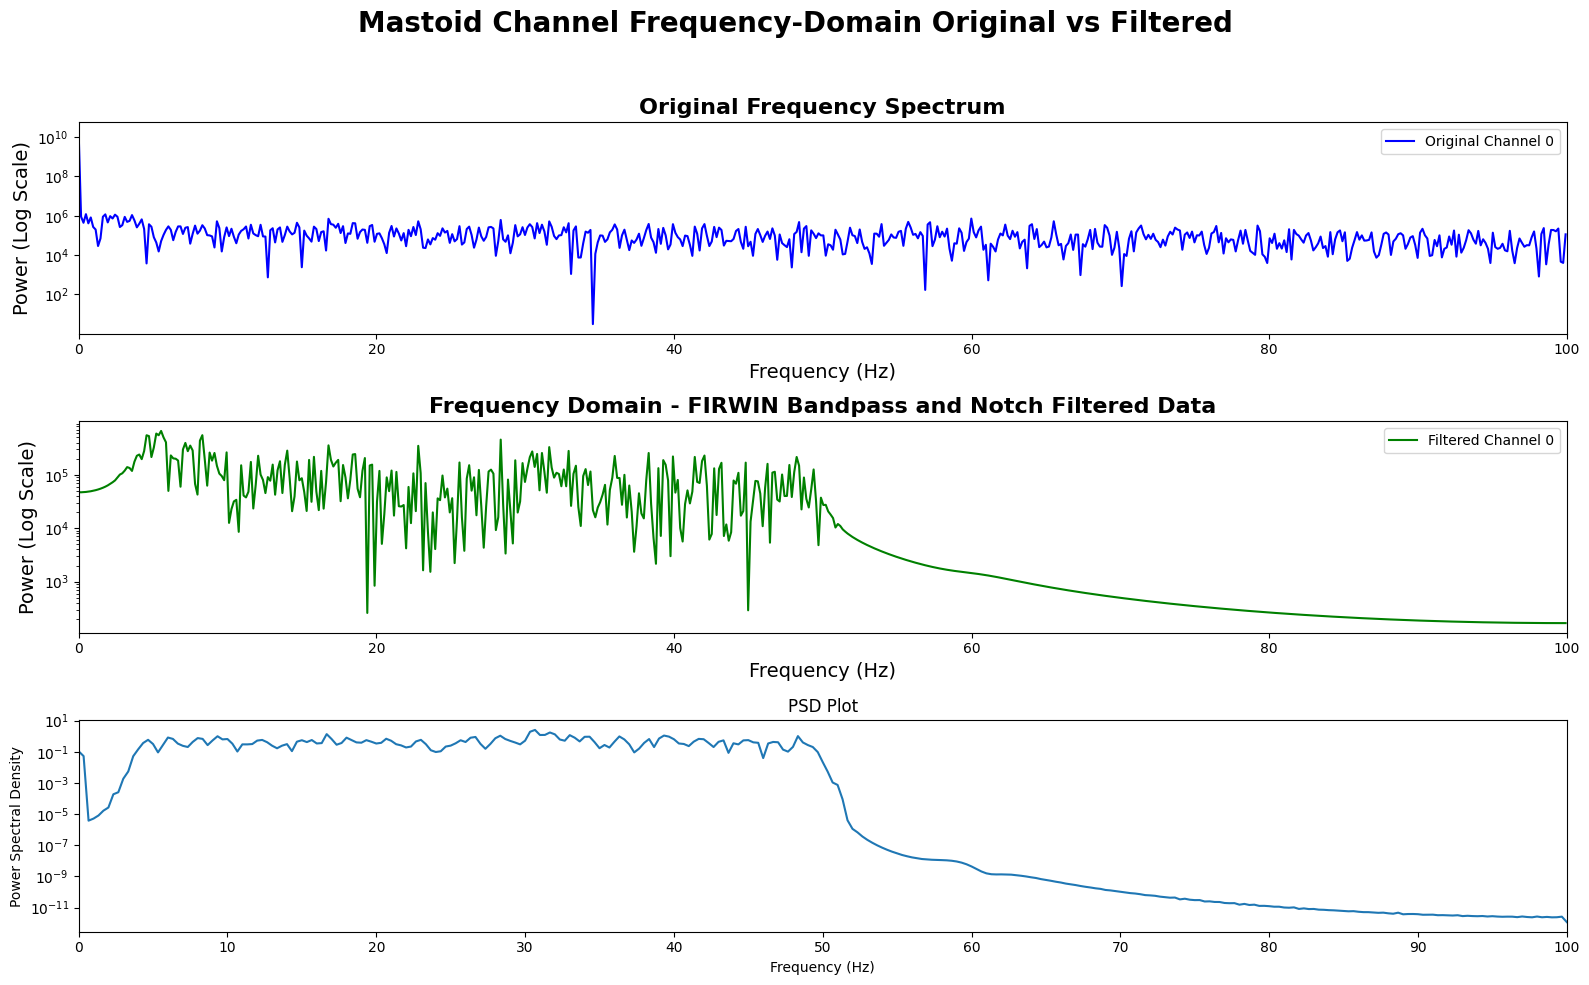

In [8]:
# # Function for just the unfiltered and filtered frequency domain plots

def plot_freq_data_wwo_filter(data, fs, channels, power_ylim=None):

    n_channels, n_samples = data.shape

    fig, axes = plt.subplots(3, 1, figsize=(16, 10))
    fig.suptitle("Mastoid Channel Frequency-Domain Original vs Filtered", fontsize=20, fontweight='bold')

    # Compute frequency axis
    freqs = rfftfreq(n_samples, d=1 / fs)

    # Plot the original frequency spectrum
    ps_original = np.abs(rfft(data[0, :])) ** 2
    axes[0].plot(freqs, ps_original, label='Original Channel 0', color='blue')
    axes[0].set_title('Original Frequency Spectrum', fontsize=16, fontweight='bold')
    axes[0].set_xlabel('Frequency (Hz)', fontsize=14)
    axes[0].set_ylabel('Power (Log Scale)', fontsize=14)
    axes[0].set_xlim([0, 100])
    axes[0].set_yscale('log')
    if power_ylim:
        axes[0].set_ylim(power_ylim)
    axes[0].legend(loc='upper right')

    # Create notch filter coefficients
    notch_freq = 60.0  
    quality_factor = 10
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, fs)

    #Apply bandpass filter (using FIR filter)
    filt_coef_test = signal.firwin(numtaps=(int(3*fs/4)), cutoff=(4,50), fs=fs, pass_zero=False)
    bp_filtered_data = signal.filtfilt(filt_coef_test,1.0,data, axis=-1)

    # Apply Notch filter (60 Hz)
    notch_filtered_data = signal.filtfilt(b_notch, a_notch, bp_filtered_data, axis=-1)
    

    #Plot the filtered frequency spectrum
    ps_filtered = np.abs(rfft(notch_filtered_data[0,:])) ** 2
    axes[1].plot(freqs, ps_filtered, label='Filtered Channel 0', color='green')
    axes[1].set_title('Frequency Domain - FIRWIN Bandpass and Notch Filtered Data', fontsize=16, fontweight='bold')
    axes[1].set_xlabel('Frequency (Hz)', fontsize=14)
    axes[1].set_ylabel('Power (Log Scale)', fontsize=14)
    axes[1].set_xlim([0, 100])
    axes[1].set_yscale('log')
    if power_ylim:
        axes[1].set_ylim(power_ylim)
    axes[1].legend(loc='upper right')

    f_psd,psd = signal.welch(notch_filtered_data[0,:],nperseg=int(fs*3),fs=fs)

    axes[2].semilogy(f_psd,psd)
    axes[2].set(title='PSD Plot',xlabel='Frequency (Hz)', ylabel='Power Spectral Density')
    axes[2].set(xlim=[0,100],xticks=np.arange(0,101,10))



    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


plot_freq_data_wwo_filter(test_data, fs, channels)


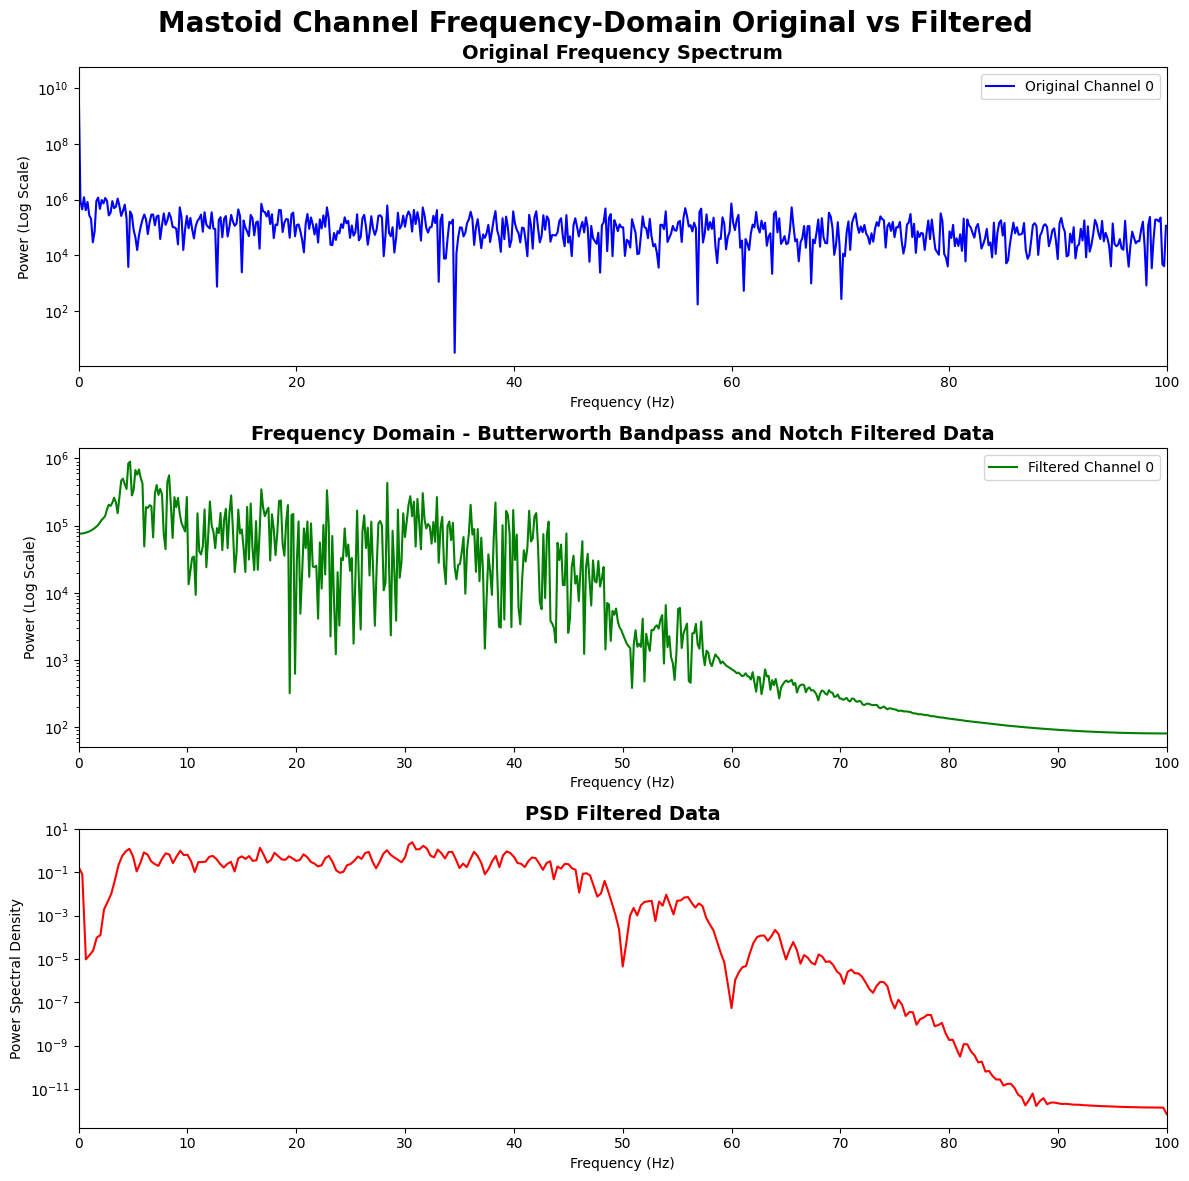

In [9]:
# # Function for just the unfiltered and filtered frequency domain plots

def plot_freq_data_wwo_filter(data, fs, channels, power_ylim=None):

    n_channels, n_samples = data.shape

    fig, ax = plt.subplots(3, 1, figsize=(12,12))
    fig.suptitle("Mastoid Channel Frequency-Domain Original vs Filtered", fontsize=20, fontweight='bold')

    # Compute frequency axis
    freqs = rfftfreq(n_samples, d=1 / fs)

    #Plot the original frequency spectrum
    ps_original = np.abs(rfft(data[0, :])) ** 2
    ax[0].plot(freqs, ps_original, label='Original Channel 0', color='blue')
    ax[0].set_title('Original Frequency Spectrum', fontsize=14, fontweight='bold')
    ax[0].set_xlabel('Frequency (Hz)', fontsize=10)
    ax[0].set_ylabel('Power (Log Scale)', fontsize=10)
    ax[0].set_xlim([0, 100])
    ax[0].set_yscale('log')
    if power_ylim:
        ax[0].set_ylim(power_ylim)
    ax[0].legend(loc='upper right')

    # Create the filter parameters (Butterworth)
    nyquist = fs / 2
    low, high = 4, 50 
    order = 4

    # Design Butterworth bandpass filter coefficients
    b, a = signal.butter(order, [low, high], btype='band', fs=fs)

    # Notch filters (50 Hz & 60 Hz)
    notch_freq50 = 50
    notch_freq60 = 60
    quality_factor = 10
    b_notch, a_notch = signal.iirnotch(notch_freq50, quality_factor, fs)
    b_notch2, a_notch2 = signal.iirnotch(notch_freq60, quality_factor, fs)

    # Apply butterworth bandpass filter
    filtered_signal = signal.filtfilt(b, a,data)
    # Apply notch filter at 50 hz
    notch_filtered_data = signal.filtfilt(b_notch, a_notch, filtered_signal, axis=-1)
    # Apply notch filter at 60 Hz
    notch_filtered_data = signal.filtfilt(b_notch2,a_notch2, notch_filtered_data, axis=-1)

    # Plot the filtered frequency spectrum
    ps_filtered = np.abs(rfft(notch_filtered_data[0, :])) ** 2
    ax[1].plot(freqs, ps_filtered, label='Filtered Channel 0', color='green')
    ax[1].set_title('Frequency Domain - Butterworth Bandpass and Notch Filtered Data', fontsize=14, fontweight='bold')
    ax[1].set_xlabel('Frequency (Hz)', fontsize=10)
    ax[1].set_ylabel('Power (Log Scale)', fontsize=10)
    ax[1].set_xlim([0, 100])
    ax[1].set_xticks(np.arange(0,101,10))
    ax[1].set_yscale('log')
    if power_ylim:
        ax[1].set_ylim(power_ylim)
    ax[1].legend(loc='upper right')


    # Plot the PSD
    freqs, psd = signal.welch(notch_filtered_data, nperseg=int(3*fs),fs=fs)

    ax[2].plot(freqs,psd[0,:], label='Filtered Channel 0', color='red')
    ax[2].set_title("PSD Filtered Data", fontsize=14, fontweight='bold')
    ax[2].set(xlabel="Frequency (Hz)", ylabel='Power Spectral Density')
    ax[2].set(xlim=[0,100],xticks=(np.arange(0,101,10)))
    ax[2].set(yscale='log')

    plt.tight_layout()
    plt.show()

plot_freq_data_wwo_filter(test_data, fs, channels)


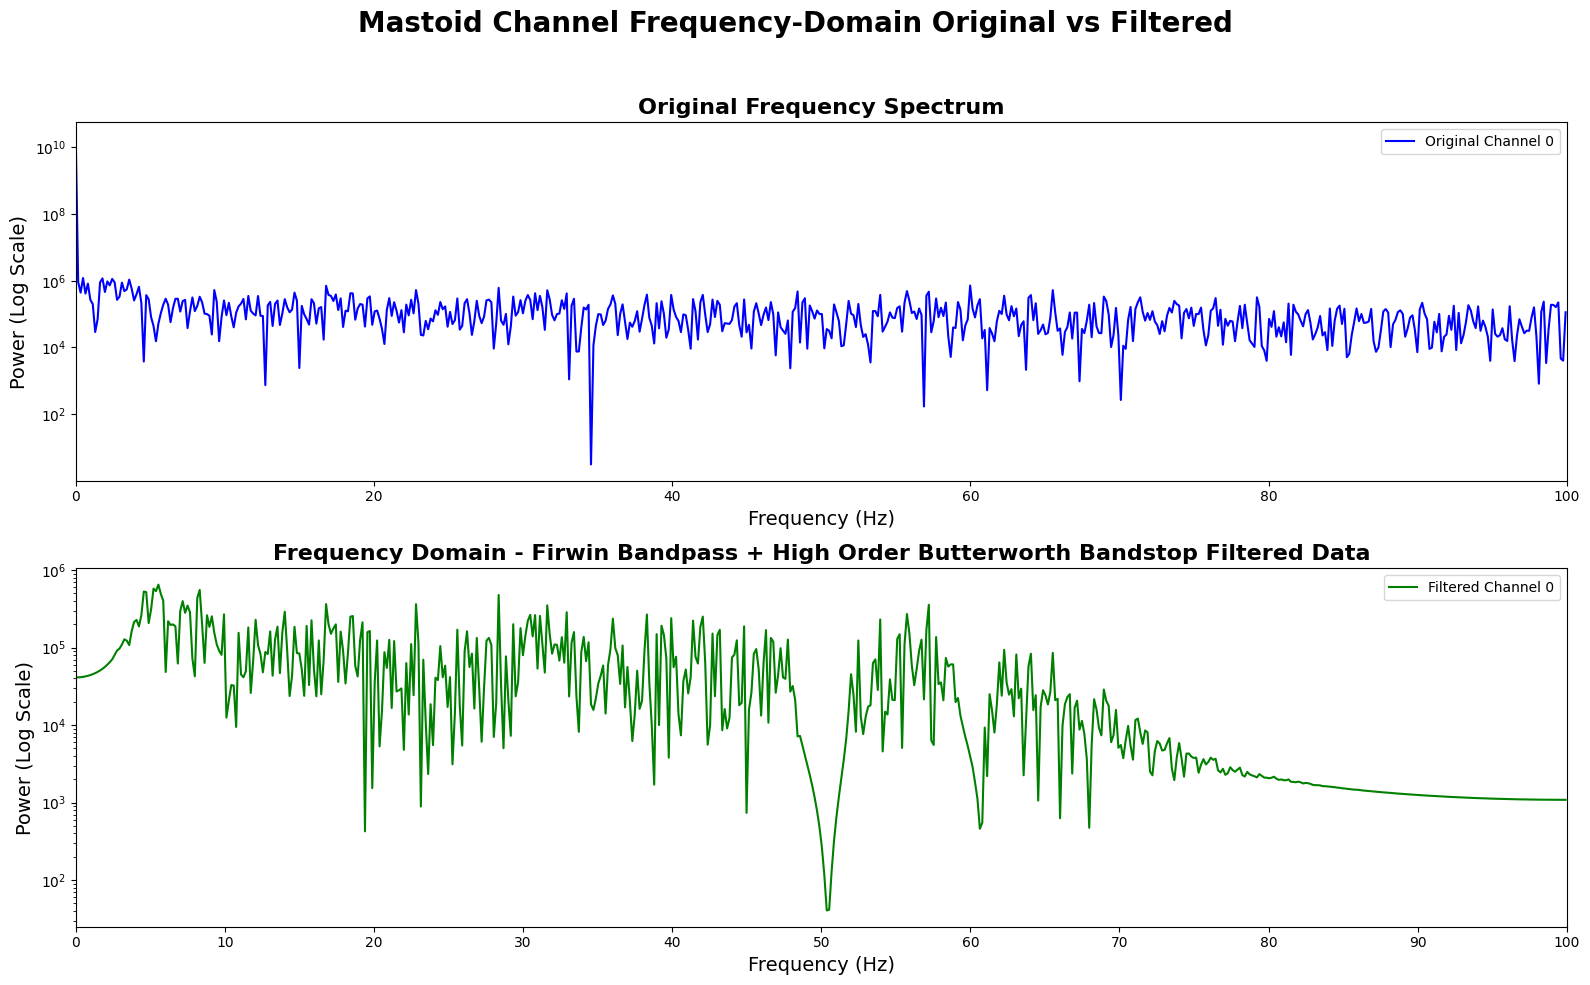

In [10]:
# # Function for just the unfiltered and filtered frequency domain plots (Firwin BandStop)

def plot_freq_data_wwo_filter(data, fs, channels, power_ylim=None):

    n_channels, n_samples = data.shape

    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    fig.suptitle("Mastoid Channel Frequency-Domain Original vs Filtered", fontsize=20, fontweight='bold')

    # Compute frequency axis
    freqs = rfftfreq(n_samples, d=1 / fs)

    # Plot the original frequency spectrum
    ps_original = np.abs(rfft(data[0, :])) ** 2
    axes[0].plot(freqs, ps_original, label='Original Channel 0', color='blue')
    axes[0].set_title('Original Frequency Spectrum', fontsize=16, fontweight='bold')
    axes[0].set_xlabel('Frequency (Hz)', fontsize=14)
    axes[0].set_ylabel('Power (Log Scale)', fontsize=14)
    axes[0].set_xlim([0, 100])
    axes[0].set_yscale('log')
    if power_ylim:
        axes[0].set_ylim(power_ylim)
    axes[0].legend(loc='upper right')


    # Create the filters
    nyquist = fs / 2
    low_cut1, high_cut1 = 48 / nyquist, 52 / nyquist
    b, a = signal.butter(N=8, Wn=[low_cut1, high_cut1], btype='bandstop')
    # Apply 48-51Hz bandstop filter
    filtered_data = signal.filtfilt(b, a, data, axis=-1)

    # Apply 59-61Hz bandstop filter
    low_cut2, high_cut2 = 59 / nyquist, 61 / nyquist
    b2, a2 = signal.butter(N=8, Wn=[low_cut2, high_cut2], btype='bandstop')
    filtered_data2 = signal.filtfilt(b2, a2, filtered_data, axis=-1)

    # Apply firwin bandpass 
    filt_coef = signal.firwin(numtaps=(int(3*fs/4)), cutoff=(4,98), fs=fs, pass_zero=False)
    bp_filtered_data = signal.filtfilt(filt_coef,1.0,filtered_data2, axis=-1)

    # # Low Pass filter
    # filt_coef3 = signal.firwin(numtaps=(int(3*fs/62)), cutoff=(62), fs=fs, pass_zero=True)
    # bp_filtered_data = signal.filtfilt(filt_coef3,1.0,bp_filtered_data, axis=-1)

    nyquist = fs / 2
    cutoff_freq = 64 / nyquist  # 90 Hz cutoff

    # Butterworth low-pass filter
    b_low, a_low = signal.butter(N=4, Wn=cutoff_freq, btype='low')
    bp_filtered_data2 = signal.filtfilt(b_low, a_low, bp_filtered_data, axis=-1)

    # Plot the filtered frequency spectrum
    ps_filtered = np.abs(rfft(bp_filtered_data2[0, :])) ** 2
    axes[1].plot(freqs, ps_filtered, label='Filtered Channel 0', color='green')
    axes[1].set_title('Frequency Domain - Firwin Bandpass + High Order Butterworth Bandstop Filtered Data', fontsize=16, fontweight='bold')
    axes[1].set_xlabel('Frequency (Hz)', fontsize=14)
    axes[1].set_ylabel('Power (Log Scale)', fontsize=14)
    axes[1].set_xlim([0, 100])
    axes[1].set_xticks(np.arange(0,101,10))
    axes[1].set_yscale('log')
    if power_ylim:
        axes[1].set_ylim(power_ylim)
    axes[1].legend(loc='upper right')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


plot_freq_data_wwo_filter(test_data, fs, channels)


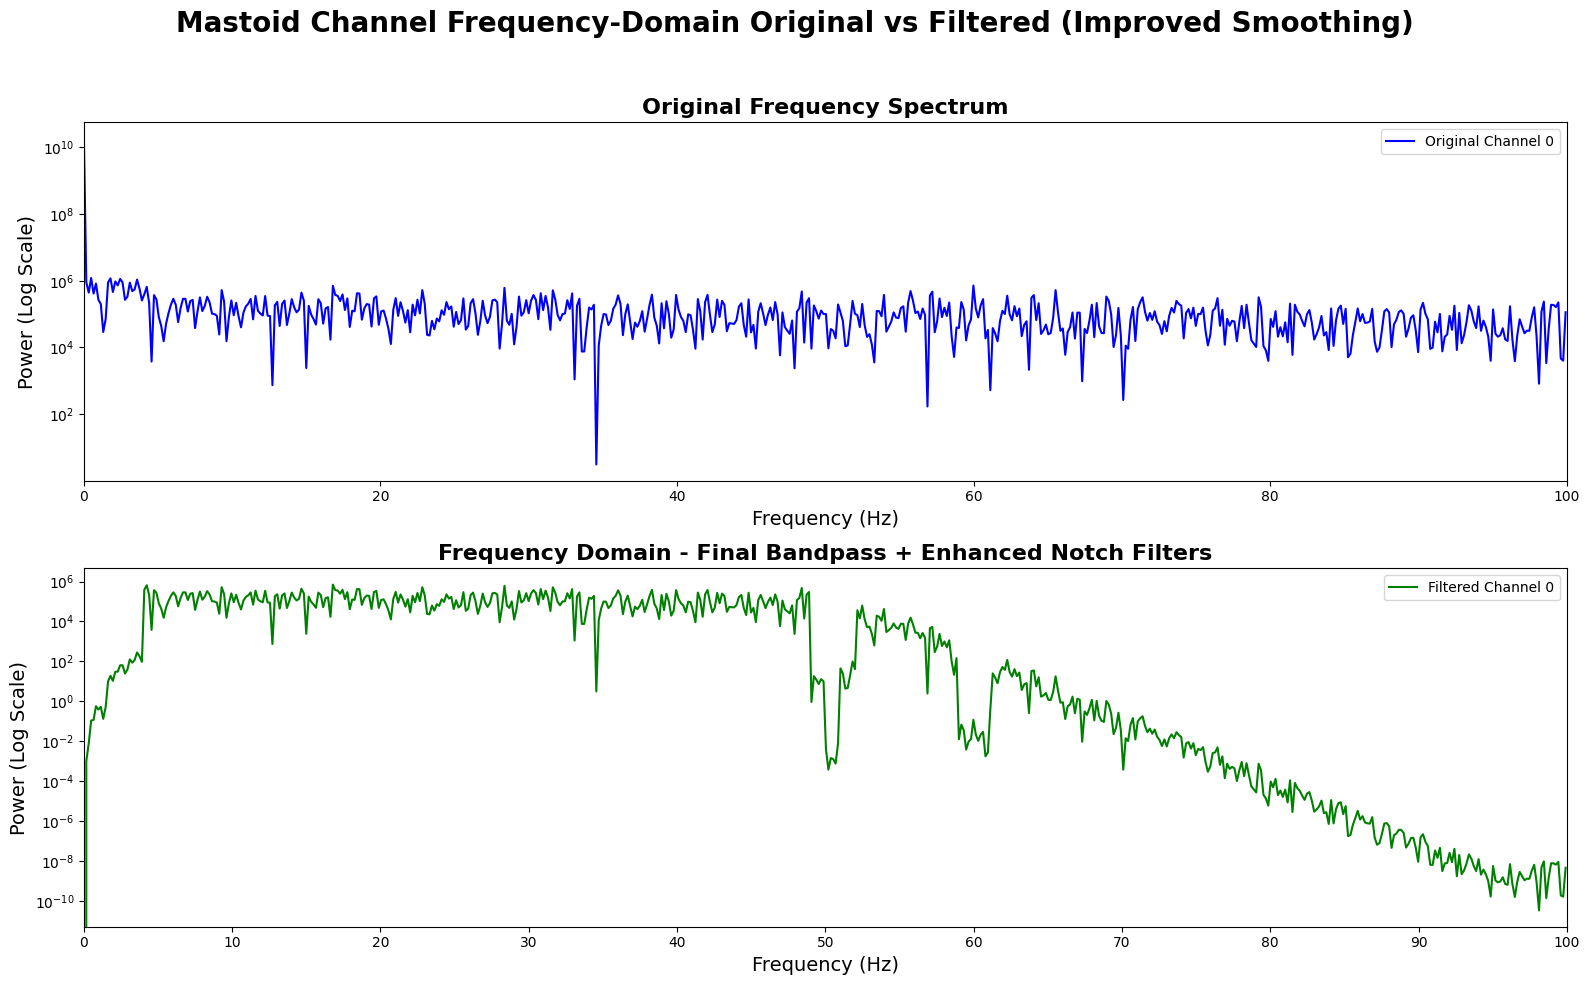

In [11]:
def plot_freq_data_wwo_filter(data, fs, channels, power_ylim=None):
    n_channels, n_samples = data.shape

    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    fig.suptitle("Mastoid Channel Frequency-Domain Original vs Filtered (Improved Smoothing)", fontsize=20, fontweight='bold')

    # Frequency axis
    freqs = np.fft.rfftfreq(n_samples, d=1 / fs)

    # FFT of original data
    data_fft = np.fft.rfft(data[0, :])

    # Plot original frequency spectrum
    ps_original = np.abs(data_fft) ** 2
    axes[0].plot(freqs, ps_original, label='Original Channel 0', color='blue')
    axes[0].set_title('Original Frequency Spectrum', fontsize=16, fontweight='bold')
    axes[0].set_xlabel('Frequency (Hz)', fontsize=14)
    axes[0].set_ylabel('Power (Log Scale)', fontsize=14)
    axes[0].set_xlim([0, 100])
    axes[0].set_yscale('log')
    axes[0].legend(loc='upper right')

    # Frequency-Domain Filtering

    # Bandpass Filter (smooth taper for 0-4 Hz and limit up to 50 Hz)
    low_freq_mask = freqs < 4
    smooth_taper = (freqs[low_freq_mask] / 4) ** 2  # Quadratic increase in power from 0 to 4 Hz
    data_fft[low_freq_mask] *= smooth_taper

    # Bandpass filter for 4-50 Hz remains
    bandpass_mask = (freqs >= 4) & (freqs <= 50)
    data_fft[~bandpass_mask] *= 0.02


    # Notch filters with smoother transition
    notch_50_mask = (freqs >= 49) & (freqs <= 51)
    notch_60_mask = (freqs >= 59) & (freqs <= 61)

    data_fft[notch_50_mask] *= 0.01
    data_fft[notch_60_mask] *= 0.01

    # # Smooth decline between 51-59 Hz using a custom curve
    # mid_freq_mask = (freqs > 51) & (freqs < 59)
    # transition_curve = 1 - ((freqs[mid_freq_mask] - 51) / (59 - 51)) ** 2  # Quadratic decline
    # data_fft[mid_freq_mask] *= transition_curve

    # Gradual attenuation beyond 62 Hz
    high_freq_mask = freqs > 52
    decay_rate = 0.35
    data_fft[high_freq_mask] *= np.maximum(10e-6, np.exp(-decay_rate * (freqs[high_freq_mask] - 62)))

    # Inverse FFT to reconstruct filtered data
    filtered_data = np.fft.irfft(data_fft)

    # Plot filtered frequency spectrum
    ps_filtered = np.abs(data_fft) ** 2
    axes[1].plot(freqs, ps_filtered, label='Filtered Channel 0', color='green')
    axes[1].set_title('Frequency Domain - Final Bandpass + Enhanced Notch Filters', fontsize=16, fontweight='bold')
    axes[1].set_xlabel('Frequency (Hz)', fontsize=14)
    axes[1].set_ylabel('Power (Log Scale)', fontsize=14)
    axes[1].set_xlim([0, 100])
    axes[1].set_xticks(np.arange(0, 101, 10))
    axes[1].set_yscale('log')
    axes[1].legend(loc='upper right')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


plot_freq_data_wwo_filter(test_data, fs, channels)


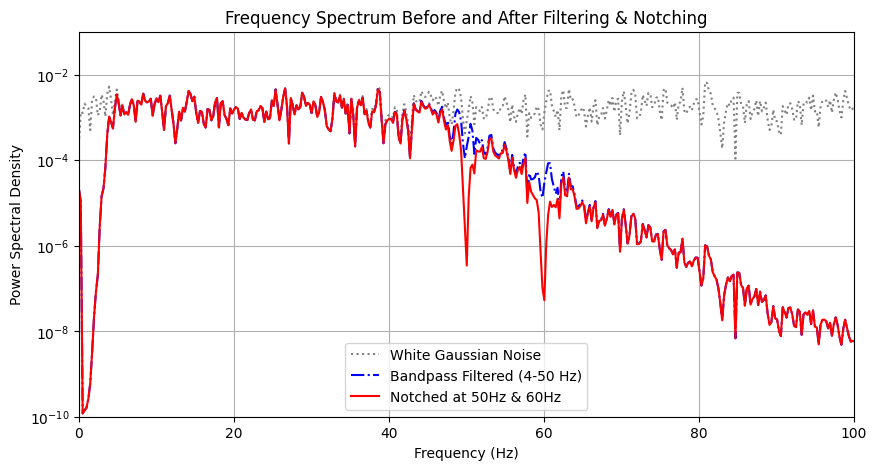

In [12]:
# Generate White Gaussian Noise with more samples
fs = 1000              # Sampling frequency (Hz)
duration = 10          # 10 seconds of data
t = np.arange(0, duration, 1/fs)  # Time vector

np.random.seed(42)     # For reproducibility
white_noise = np.random.randn(len(t))  # White Gaussian Noise

# Design Butterworth Bandpass Filter (4Hz - 50Hz)
lowcut = 4
highcut = 50
order = 4              # Filter order

# Normalize frequencies to Nyquist frequency and create filter
b_band, a_band = signal.butter(order, [lowcut, highcut], btype='band', fs=fs)

# Apply the Bandpass Filter
filtered_signal = signal.filtfilt(b_band, a_band, white_noise)

# Define a function to apply a notch filter
def notch_filter(signal_in, freq, fs, Q=30):
    notch_freq = freq / (fs / 2)  # Normalize frequency
    b_notch, a_notch = signal.iirnotch(notch_freq, Q)
    return signal.filtfilt(b_notch, a_notch, signal_in)

# Apply notch filters at 50Hz and 60Hz
signal_notched_50 = notch_filter(filtered_signal, 50, fs)
signal_final = notch_filter(signal_notched_50, 60, fs)

# Compute the frequency spectrum using Welch’s method
frequencies, power_spectrum_raw = signal.welch(white_noise, fs, nperseg=4096)
frequencies, power_spectrum_filtered = signal.welch(filtered_signal, fs, nperseg=4096)
frequencies, power_spectrum_final = signal.welch(signal_final, fs, nperseg=4096)

# Plot the frequency spectra with scaled y-axis
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, power_spectrum_raw, label="White Gaussian Noise", linestyle='dotted', color='gray')
plt.semilogy(frequencies, power_spectrum_filtered, label="Bandpass Filtered (4-50 Hz)", linestyle='dashdot', color='blue')
plt.semilogy(frequencies, power_spectrum_final, label="Notched at 50Hz & 60Hz", linestyle='solid', color='red')

plt.xlim(0, 100)        # Limit frequency axis to 0-100 Hz
plt.ylim(1e-10, 1e-1)   # Scale y-axis between 10^-10 and 10^-1
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.title("Frequency Spectrum Before and After Filtering & Notching")
plt.legend()
plt.grid()
plt.show()


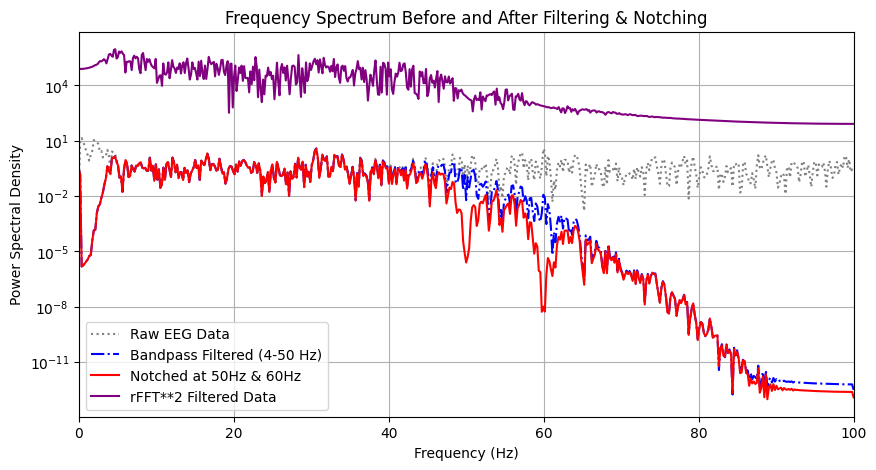

In [13]:
# Load data
eeg_data = test_data[0, :]  # Replace with your EEG channel

# Set parameters
fs = 200  # Sampling frequency
duration = len(eeg_data) / fs  # Calculate duration from sample count

# Bandpass filter parameters
lowcut = 4
highcut = 50
order = 4 

# Design Butterworth bandpass filter
b_band, a_band = signal.butter(order, [lowcut, highcut], btype='band', fs=fs)

# Apply the bandpass filter
filtered_signal = signal.filtfilt(b_band, a_band, eeg_data)

# Define a function to apply a notch filter
def notch_filter(signal_in, freq, fs, Q=10):
    notch_freq = freq / (fs / 2)  # Normalize frequency
    b_notch, a_notch = signal.iirnotch(notch_freq, Q)
    return signal.filtfilt(b_notch, a_notch, signal_in)

# Apply notch filters at 50Hz and 60Hz
signal_notched_50 = notch_filter(filtered_signal, 50, fs)
signal_final = notch_filter(signal_notched_50, 60, fs)

# Compute frequency spectrum using Welch’s method
frequencies, power_spectrum_raw = signal.welch(eeg_data, fs, nperseg=1024)
frequencies, power_spectrum_filtered = signal.welch(filtered_signal, fs, nperseg=1024)
frequencies, power_spectrum_final = signal.welch(signal_final, fs, nperseg=1024)
ft = abs(rfft(signal_final))
ps = ft**2
fq = rfftfreq(signal_final.size, d=1/fs)

# Plot the frequency spectra
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, power_spectrum_raw, label="Raw EEG Data", linestyle='dotted', color='gray')
plt.semilogy(frequencies, power_spectrum_filtered, label="Bandpass Filtered (4-50 Hz)", linestyle='dashdot', color='blue')
plt.semilogy(frequencies, power_spectrum_final, label="Notched at 50Hz & 60Hz", linestyle='solid', color='red')
plt.semilogy(fq,ps, label= "rFFT**2 Filtered Data", color='purple')

plt.xlim(0, 100)        # Limit frequency axis to 0-100 Hz
#plt.ylim(1e-10, 1e-1)   # Scale y-axis between 10^-10 and 10^-1
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.title("Frequency Spectrum Before and After Filtering & Notching")
plt.legend()
plt.grid()
plt.show()


# Old Code

In [292]:
# # # Frequency Domain with and without Stopband filter

# # def smooth_signal(data, window_size=2):
# #     return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# # Apply a rolling (moving average) filter 
# def smooth_signal(data, window_size):
#     return uniform_filter1d(data, size=window_size)

# def downsample_data(data, downsample=2):
#     return data[::downsample]

# def plot_freq_data_wwo_filter(data, fs, channels, power_ylim=None):
#     n_channels, n_samples = data.shape

#     fig, axes = plt.subplots(3, 1, figsize=(16, 15))
#     fig.suptitle("Frequency-Domain Comparison (Original vs Filtered) & iFFT", fontsize=20, fontweight='bold')

#     freqs = rfftfreq(n_samples, d=1 / fs)

   
#     ps_original = np.abs(rfft(data[0, :])) ** 2
#     axes[0].plot(freqs, ps_original, label=f'Channel 0')
#     axes[0].set_title('Original Frequency Spectrum', fontsize=16, fontweight='bold')
#     axes[0].set_xlabel('Frequency (Hz)', fontsize=14)
#     axes[0].set_ylabel('Power (Log Scale)', fontsize=14)
#     axes[0].set_xlim([0, 100])
#     axes[0].set_yscale('log')
#     if power_ylim:
#         axes[0].set_ylim(power_ylim)
#     axes[0].legend(loc='upper right')

#     # Apply stopband filter
#     filtered_data = bandstop_filter(data)

#     # Apply bandpass filter (using FIR filter)
#     bp_filtered_data = signal.lfilter(filt_coef,1.0,data, axis=-1)

#     ps_filtered = np.abs(rfft(bp_filtered_data[0, :])) ** 2
#     axes[1].plot(freqs, ps_filtered, label=f'Channel 0')
#     axes[1].set_title('Bandpass Filtered Frequency Spectrum', fontsize=16, fontweight='bold')
#     axes[1].set_xlabel('Frequency (Hz)', fontsize=14)
#     axes[1].set_ylabel('Power (Log Scale)', fontsize=14)
#     axes[1].set_xlim([0, 100])
#     axes[1].set_yscale('log')
#     if power_ylim:
#         axes[1].set_ylim(power_ylim)
#     axes[1].legend(loc='upper right')

    
#     time_vec = np.arange(0,n_samples/fs-1/fs,1/fs) 
#     ifft_filtered = irfft(rfft(filtered_data[0, :]))

#     smoothed_ifft = smooth_signal(ifft_filtered, window_size=6)  # first smoothing function
#     downsampled_ifft = downsample_data(ifft_filtered,downsample=5)
   
#     axes[2].plot(time_vec, smoothed_ifft, lw=2,label=f'Channel 0 (iFFT)')
#     axes[2].set_title('Reconstructed Signal (iFFT of Filtered Data with Smoothing)', fontsize=16, fontweight='bold')
#     axes[2].set_xlabel('Time (s)', fontsize=14)
#     axes[2].set_ylabel('Amplitude (uV)', fontsize=14)
#     axes[2].set_xlim([0,t_vec[-1]])
#     axes[2].set_ylim([90,130])
#     axes[2].legend(loc='upper right')

#     plt.tight_layout(rect=[0, 0, 1, 0.95])
#     plt.show()


# plot_freq_data_wwo_filter(test_data, fs, channels)

In [ ]:
# # def notch_filter(data, notches=[60, 120, 180], quality_factor=3000, fs=200):
# #     for notch in notches:
# #         w0 = notch / (fs / 2)
# #         b, a = signal.iirnotch(w0, quality_factor)
# #         data = signal.filtfilt(b, a, data, axis=1)
# #     return data

# # # With NOTCH FILTER APPLIED

# def notch_filter(data,notch=60,quality_factor=3000,fs=fs):
#   b,a = signal.iirnotch(notch,quality_factor,fs)
#   filtered_signal = signal.lfilter(b,a,data)
#   return filtered_signal

# def plot_freq_data_notch(data, fs, channels, power_ylim=None):
#     n_channels, n_samples = data.shape

#     fig, axes = plt.subplots(2, 1, figsize=(16, 10))
#     fig.suptitle("Frequency-Domain Comparison (Original vs Notch-Filtered)", fontsize=20, fontweight='bold')

#     # Frequency vector for entire data duration
#     freqs = rfftfreq(n_samples, d=1 / fs)

#     # Plot original frequency domain data for the first channel
#     ps_original = np.abs(rfft(data[0, :])) ** 2
#     axes[0].plot(freqs, ps_original, label=f'Channel {channels[0]}')
#     axes[0].set_title('Original Frequency Spectrum', fontsize=16, fontweight='bold')
#     axes[0].set_xlabel('Frequency (Hz)', fontsize=14)
#     axes[0].set_ylabel('Power (Log Scale)', fontsize=14)
#     axes[0].set_xlim([4, 80])
#     axes[0].set_yscale('log')
#     if power_ylim:
#         axes[0].set_ylim(power_ylim)
#     axes[0].legend(loc='upper right')

#     # Apply notch filter
#     filtered_data = notch_filter(data)

#     # Plot notch-filtered frequency domain data for the first channel
#     ps_filtered = np.abs(rfft(filtered_data[0, :])) ** 2
#     axes[1].plot(freqs, ps_filtered, label=f'Channel {channels[0]}')
#     axes[1].set_title('Notch Filtered Frequency Spectrum', fontsize=16, fontweight='bold')
#     axes[1].set_xlabel('Frequency (Hz)', fontsize=14)
#     axes[1].set_ylabel('Power (Log Scale)', fontsize=14)
#     axes[1].set_xlim([4, 80])
#     axes[1].set_yscale('log')
#     if power_ylim:
#         axes[1].set_ylim(power_ylim)
#     axes[1].legend(loc='upper right')

#     plt.tight_layout(rect=[0, 0, 1, 0.95])
#     plt.show()


# plot_freq_data_notch(test_data, fs, channels)